<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import the basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [14]:
df = pd.read_csv('NIFTY50_all.csv') ## consists of data of 65 Nifty stocks
## has features like opening,closing,high,low prices and volume of shares traded
##VWAP stands for volume weighted average price (a term used in share market) ==> our target variable
##symbol is the name of different stocks

In [16]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [17]:
df.shape

(235192, 15)

In [18]:
df.Symbol.nunique()

65

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [20]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [21]:
## change date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [23]:
print(df['Date'].min())
print(df['Date'].max())

2000-01-03 00:00:00
2021-04-30 00:00:00


In [25]:
df.Symbol.value_counts()

,count
Symbol,
IOC,5306
CIPLA,5306
M&M,5306
ICICIBANK,5306
ONGC,5306
...,...
MUNDRAPORT,1023
TELCO,999
KOTAKMAH,502


In [26]:
df = df[['Date','Symbol','Open','Close','High','Low','VWAP','Volume']]

In [27]:
df

,Date,Symbol,Open,Close,High,Low,VWAP,Volume
0,2007-11-27,MUNDRAPORT,770.00,962.90,1050.00,770.00,984.72,27294366
1,2007-11-28,MUNDRAPORT,984.00,893.90,990.00,874.00,941.38,4581338
2,2007-11-29,MUNDRAPORT,909.00,884.20,914.75,841.00,888.09,5124121
3,2007-11-30,MUNDRAPORT,890.00,921.55,958.00,890.00,929.17,4609762
4,2007-12-03,MUNDRAPORT,939.75,969.30,995.00,922.00,965.65,2977470
...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,190.60,186.40,191.10,185.10,187.35,8542755
235188,2021-04-27,ZEEL,188.00,188.15,192.95,186.80,189.41,14247767
235189,2021-04-28,ZEEL,188.80,189.10,190.60,187.10,188.85,8429439
235190,2021-04-29,ZEEL,190.80,186.55,191.65,186.00,187.44,9483009


In [28]:
df.duplicated().sum()

0

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [30]:
###homework - write a loop for the below code:
print(sm.stats.durbin_watson(df['VWAP']))
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))
print(sm.stats.durbin_watson(df['High']))
print(sm.stats.durbin_watson(df['Low']))

0.0014277598023373546
0.0015870073457078119
0.0015201473988800853
0.0014694358123648094
0.0015302998074600996


In [31]:
df.describe()

,Date,Open,Close,High,Low,VWAP,Volume
count,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05
mean,2011-05-22 13:18:08.975815680,1267.759708,1266.554351,1286.581440,1247.488465,1267.13230,3.045903e+06
min,2000-01-03 00:00:00,8.500000,9.150000,9.750000,8.500000,9.21000,3.000000e+00
25%,2006-07-03 00:00:00,275.000000,274.350000,279.500000,269.600000,274.69750,2.190095e+05
50%,2011-08-19 00:00:00,567.025000,566.700000,576.900000,556.500000,566.94000,1.010938e+06
75%,2016-06-24 00:00:00,1243.312500,1242.400000,1263.000000,1221.650000,1242.66250,3.019851e+06
max,2021-04-30 00:00:00,33399.950000,32861.950000,33480.000000,32468.100000,32975.24000,4.810589e+08
std,NaN,2585.259609,2582.140942,2619.649216,2546.621396,2582.69998,7.333981e+06


In [32]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [33]:
stock_name = 'IOC'
df1 = df[df['Symbol'] == stock_name]
df1.head()

,Date,Symbol,Open,Close,High,Low,VWAP,Volume
117186,2000-01-03,IOC,260.0,270.85,273.25,250.00,258.55,23700
117187,2000-01-04,IOC,260.0,264.40,268.00,254.10,259.80,24400
117188,2000-01-05,IOC,264.9,261.30,265.00,257.00,260.66,18900
117189,2000-01-06,IOC,258.0,260.10,263.00,256.05,259.81,18150
117190,2000-01-07,IOC,259.9,264.45,267.00,253.25,260.11,17650


In [35]:
df1.shape

(5306, 8)

In [36]:
df1['Date'].min()

Timestamp('2000-01-03 00:00:00')

In [37]:
df1['Date'].max()

Timestamp('2021-04-30 00:00:00')

<Axes: >

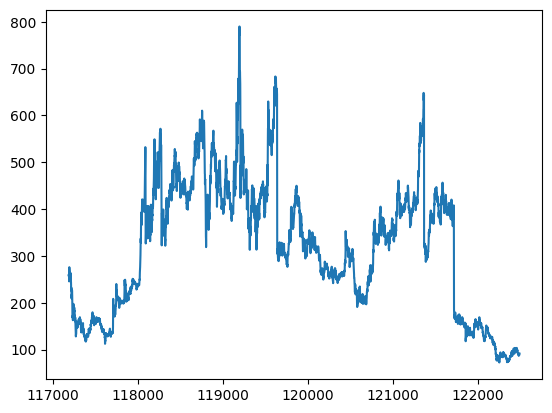

In [38]:
df1['VWAP'].plot()